In [135]:
%pip install decorator==5.0.9

import imp
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [136]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)

<module 'utils.utils' from '../src/utils/utils.py'>

In [137]:
a_zwickau_text = thesisDataReader.read_a_zwickau()
b_london_text = thesisDataReader.read_b_london()

In [138]:
a_zwickau_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(a_zwickau_text))
b_london_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(b_london_text))

In [139]:
def get_features(corpus):
    count_vectorizer = CountVectorizer()
    sparse_matrix = count_vectorizer.fit_transform(corpus)
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())
    return df


In [239]:
a_zwickau_df = get_features(a_zwickau_corpus)
a_zwickau_similarities = cosine_similarity(a_zwickau_df, a_zwickau_df)

b_london_df = get_features(b_london_corpus)
b_london_similarities = cosine_similarity(b_london_df, b_london_df)

In [140]:
def show_similarities_data(similarities):
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        print('___ max similariry for paragraph: {} ___'.format(index))
        for i in max_indices:
            print('index: [{}] value: {}'.format(i, similarities[index][i]))
        print('average: {}'.format(np.average(value)))

        unique, counts = np.unique(value, return_counts=True)
        unique_dictionary = dict(zip(unique, counts))
        print('0 similarities: {}'.format(unique_dictionary.get(0.0)))

        print()

In [141]:
show_similarities_data(a_zwickau_similarities)

___ max similariry for paragraph: 0 ___
index: [147] value: 0.08489527199560178
index: [79] value: 0.09325048082403138
index: [19] value: 0.13093073414159542
index: [49] value: 0.14907119849998596
index: [321] value: 0.2981423969999719
index: [0] value: 0.9999999999999999
average: 0.010523573386299726
0 similarities: 277

___ max similariry for paragraph: 1 ___
index: [283] value: 0.5207785898979804
index: [288] value: 0.5210797334966377
index: [42] value: 0.5221787059499383
index: [280] value: 0.5426208331435108
index: [289] value: 0.5659670877347581
index: [1] value: 1.0000000000000002
average: 0.27136194652898976
0 similarities: 4

___ max similariry for paragraph: 2 ___
index: [10] value: 0.33892841149279485
index: [297] value: 0.3436288414836225
index: [184] value: 0.34538959804401387
index: [123] value: 0.35689512920876265
index: [182] value: 0.37203955419831947
index: [2] value: 0.9999999999999997
average: 0.19290583474147313
0 similarities: 5

___ max similariry for paragraph: 

index: [299] value: 0.2629711204518062
index: [101] value: 0.2723849268720587
index: [219] value: 0.3009646327144231
index: [210] value: 0.9999999999999997
average: 0.14175767220474092
0 similarities: 2

___ max similariry for paragraph: 211 ___
index: [201] value: 0.5322650914479395
index: [297] value: 0.5530684173876804
index: [169] value: 0.5610765942731873
index: [64] value: 0.5636452794553989
index: [70] value: 0.5717473459704991
index: [211] value: 1.0000000000000002
average: 0.3432198041539042
0 similarities: 1

___ max similariry for paragraph: 212 ___
index: [182] value: 0.3896680269807997
index: [121] value: 0.3901794323484754
index: [88] value: 0.3907204023704541
index: [123] value: 0.3921465945863517
index: [184] value: 0.43543327031339285
index: [212] value: 1.0000000000000002
average: 0.22867600837879776
0 similarities: 3

___ max similariry for paragraph: 213 ___
index: [280] value: 0.371616661058901
index: [299] value: 0.374585125915641
index: [36] value: 0.382506646110

In [142]:
show_similarities_data(b_london_similarities)

___ max similariry for paragraph: 0 ___
index: [216] value: 0.22473328748774737
index: [46] value: 0.23438349412361906
index: [214] value: 0.23717082451262841
index: [161] value: 0.3078745359035396
index: [19] value: 0.31622776601683794
index: [0] value: 0.9999999999999999
average: 0.07355272703048302
0 similarities: 71

___ max similariry for paragraph: 1 ___
index: [280] value: 0.5186140765681567
index: [275] value: 0.5286068316639049
index: [272] value: 0.5388068630414614
index: [313] value: 0.5523841101337049
index: [281] value: 0.5570002760135979
index: [1] value: 1.0
average: 0.2913087040852929
0 similarities: None

___ max similariry for paragraph: 2 ___
index: [174] value: 0.38851798041316415
index: [118] value: 0.3906816887604908
index: [205] value: 0.3929341334137072
index: [37] value: 0.4000988020269483
index: [289] value: 0.4074753667262725
index: [2] value: 0.9999999999999997
average: 0.23710042511207313
0 similarities: 1

___ max similariry for paragraph: 3 ___
index: [28

index: [289] value: 0.3977977230504151
index: [73] value: 0.4030272189648229
index: [24] value: 0.40378642654362407
index: [36] value: 0.40378642654362407
index: [291] value: 0.42358687104367876
index: [256] value: 0.9999999999999998
average: 0.2451761397058468
0 similarities: 1

___ max similariry for paragraph: 257 ___
index: [18] value: 0.36647045615996826
index: [291] value: 0.3675428128779635
index: [9] value: 0.38039826810497046
index: [317] value: 0.40946151242666284
index: [247] value: 0.427960492510913
index: [257] value: 1.0000000000000002
average: 0.21574908499376827
0 similarities: 2

___ max similariry for paragraph: 258 ___
index: [250] value: 0.22360679774997896
index: [247] value: 0.2631174057921088
index: [238] value: 0.2683281572999748
index: [150] value: 0.2760262237369417
index: [214] value: 0.3162277660168379
index: [258] value: 1.0
average: 0.08144207991918619
0 similarities: 21

___ max similariry for paragraph: 259 ___
index: [120] value: 0.4525557286846652
inde

Observation that paragraph 6 in both version in top 5 have paragraph 5, although with different values, but it is among top 5.

Need to pay attention that paragraph in version 1 can be completely different in version 2 - create similarity between versions

In [213]:
def get_max_similarity_per_p(similarities):
    res = []
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        max_indices_without_self = max_indices[:-1]
        max_similarity = value[max_indices_without_self[-1]]
        res.append(max_similarity)
    return res

In [214]:
a_zwickau_max_similarity_per_p = get_max_similarity_per_p(a_zwickau_similarities)
b_london_max_similarity_per_p = get_max_similarity_per_p(b_london_similarities)


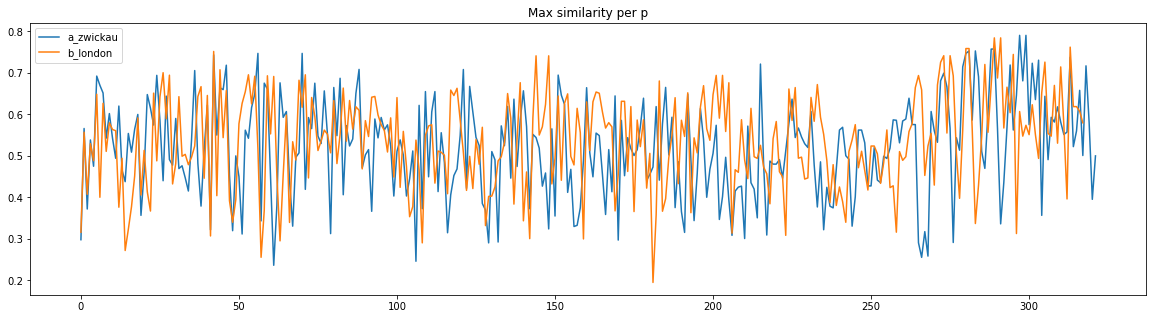

In [223]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a_zwickau_max_similarity_per_p, label="a_zwickau")
ax.plot(b_london_max_similarity_per_p, label="b_london")
ax.legend()
plt.title('Max similarity per p')
plt.show()

In [234]:
def cross_version_similarity(version_1_corpus, version_2_corpus):
    res = []
    for i, p in enumerate(version_1_corpus):
        temp_corpus = [p] + version_2_corpus
        df_features = get_features(temp_corpus)
        temp_similarities = cosine_similarity(df_features, df_features)
        res.append(temp_similarities[0])
    return res

In [235]:
a_zwickau_b_london_similarities = cross_version_similarity(a_zwickau_corpus, b_london_corpus)
b_london_a_zwickau_similarities = cross_version_similarity(b_london_corpus, a_zwickau_corpus)

In [236]:
show_similarities_data(a_zwickau_b_london_similarities)

___ max similariry for paragraph: 0 ___
index: [12] value: 0.08567058737562386
index: [160] value: 0.1025978352085154
index: [9] value: 0.10811249552346706
index: [308] value: 0.10947611030079467
index: [20] value: 0.21081851067789198
index: [0] value: 0.9999999999999999
average: 0.010492193914265511
0 similarities: 270

___ max similariry for paragraph: 1 ___
index: [281] value: 0.5265488284699746
index: [273] value: 0.5399504387011153
index: [314] value: 0.5451380586625393
index: [282] value: 0.5623233939963108
index: [2] value: 0.8902455065849022
index: [0] value: 1.0000000000000007
average: 0.2837866476302864
0 similarities: None

___ max similariry for paragraph: 2 ___
index: [175] value: 0.3500423463936537
index: [155] value: 0.35038344169883956
index: [206] value: 0.3513564844273336
index: [38] value: 0.3669364471420551
index: [3] value: 0.9379580992210835
index: [0] value: 0.9999999999999997
average: 0.20327481617767368
0 similarities: 1

___ max similariry for paragraph: 3 ___

index: [178] value: 0.2838874869788345
index: [239] value: 0.2919985580353726
index: [230] value: 0.3112715087397336
index: [261] value: 0.32444284226152503
index: [228] value: 0.3272863921790206
index: [0] value: 1.0000000000000002
average: 0.11483361220975997
0 similarities: 9

___ max similariry for paragraph: 221 ___
index: [193] value: 0.46080231978298725
index: [154] value: 0.46651026434795223
index: [60] value: 0.4693376127847855
index: [292] value: 0.4755731446487685
index: [229] value: 0.5916711719130663
index: [0] value: 1.0
average: 0.3081927026387669
0 similarities: None

___ max similariry for paragraph: 222 ___
index: [158] value: 0.31868871959954903
index: [230] value: 0.3198010745334156
index: [98] value: 0.32186315478935906
index: [251] value: 0.35000000000000003
index: [228] value: 0.41537358036784866
index: [0] value: 1.0
average: 0.13425936245341963
0 similarities: 8

___ max similariry for paragraph: 223 ___
index: [234] value: 0.48443135314835806
index: [274] valu

In [233]:
show_similarities_data(b_london_a_zwickau_similarities)

___ max similariry for paragraph: 0 ___
index: [58] value: 0.22360679774997896
index: [29] value: 0.2429328990536748
index: [91] value: 0.26967994498529685
index: [168] value: 0.3071475584169756
index: [219] value: 0.3450327796711771
index: [0] value: 0.9999999999999999
average: 0.06943010033728667
0 similarities: 88

___ max similariry for paragraph: 1 ___
index: [43] value: 0.5268140465549274
index: [284] value: 0.5316562815624934
index: [281] value: 0.5409898532368471
index: [290] value: 0.5601742216741843
index: [2] value: 0.8902455065849022
index: [0] value: 1.0
average: 0.28121229328678193
0 similarities: 4

___ max similariry for paragraph: 2 ___
index: [314] value: 0.38455746790429207
index: [124] value: 0.4044499010486059
index: [183] value: 0.40618119722996154
index: [298] value: 0.4087469906534114
index: [3] value: 0.9379580992210835
index: [0] value: 0.9999999999999997
average: 0.2299061781760085
0 similarities: 5

___ max similariry for paragraph: 3 ___
index: [170] value:

index: [284] value: 0.6121100440231811
index: [289] value: 0.6397044578575973
index: [290] value: 0.6469166747202669
index: [43] value: 0.6538590609192689
index: [216] value: 0.8984191336847316
index: [0] value: 0.9999999999999999
average: 0.3292981830246721
0 similarities: 2

___ max similariry for paragraph: 225 ___
index: [298] value: 0.5263159988875517
index: [122] value: 0.5327209053968899
index: [89] value: 0.538216467875273
index: [300] value: 0.5397252598703028
index: [217] value: 0.6242497042523301
index: [0] value: 0.9999999999999999
average: 0.3386823104848094
0 similarities: None

___ max similariry for paragraph: 226 ___
index: [281] value: 0.6239077535082465
index: [89] value: 0.6336584006687335
index: [300] value: 0.6363159271805738
index: [282] value: 0.6516485355894941
index: [298] value: 0.6644241423362224
index: [0] value: 1.0000000000000002
average: 0.37907457295090013
0 similarities: 1

___ max similariry for paragraph: 227 ___
index: [220] value: 0.423938885222570

Observation that that most paragraph in a_zwickau version are similar to they corresponding paragraph in b_london (remember that we added a new paragraph, so if p 1 similart to 2 - the meaning that 1 similart to 1, cause of a p added to b_london)

After p 20 it seems that correspondences switches, meaning that p 25 a_zwickau similar to p 27 b_london

And aligns back at p 40

At p 50 similarity switches to 50 -> 48, before it we had x -> x+2, not x -> x-2

At p 78 they even not close to any surronded paragraphs

In [237]:
a_zwickau_b_london_max_similarity_per_p = get_max_similarity_per_p(a_zwickau_b_london_similarities)
b_london_a_zwickau_max_similarity_per_p = get_max_similarity_per_p(b_london_a_zwickau_similarities)

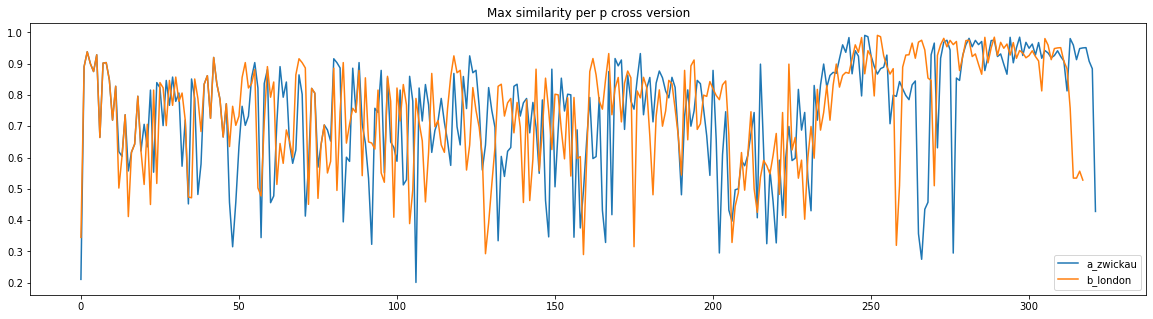

In [238]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a_zwickau_b_london_max_similarity_per_p, label="a_zwickau")
ax.plot(b_london_a_zwickau_max_similarity_per_p, label="b_london")
ax.legend()
plt.title('Max similarity per p cross version')
plt.show()

In [144]:
def create_G_of_similaritis(similarities):
    G = nx.Graph()
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        max_indices_without_self = max_indices[:-1]
        G.add_node(index) # node himself
        for n in max_indices_without_self:
            G.add_node(n)
            weight = similarities[index][n]
            G.add_weighted_edges_from([(index, n, weight)])
    return G

In [156]:
def show_G(G):
    %matplotlib notebook

    fig = plt.figure(figsize=(10, 10))
    fig.canvas.manager.full_screen_toggle()

    pos=nx.spring_layout(G)
    nx.draw(
        G, 
        pos,
        with_labels=True, 
    )
    fig.show()

In [151]:
a_zwickau_G = create_G_of_similaritis(a_zwickau_similarities)
b_london_G = create_G_of_similaritis(b_london_similarities)

In [152]:
print(len(list(nx.connected_components(a_zwickau_G))))
print(len(list(nx.connected_components(b_londob_G))))

1
1


In [160]:
a_zwickau_sorted_degree = sorted(a_zwickau_G.degree, key=lambda x: x[1], reverse=True)
print(a_zwickau_sorted_degree)
# it seems that all nodes that have degree of 5 might be not relevant since they are similar to something, 
# but nobody similar to them

[(297, 150), (299, 104), (281, 68), (303, 67), (121, 60), (280, 49), (313, 45), (42, 44), (88, 42), (70, 42), (283, 40), (318, 37), (169, 29), (288, 25), (36, 25), (289, 24), (63, 24), (182, 23), (123, 18), (81, 18), (301, 18), (152, 17), (167, 17), (74, 17), (201, 16), (91, 16), (211, 16), (101, 16), (73, 15), (21, 14), (72, 14), (76, 14), (273, 14), (46, 14), (58, 14), (64, 14), (56, 13), (192, 13), (77, 13), (184, 12), (59, 12), (78, 12), (251, 12), (137, 12), (98, 12), (149, 11), (87, 11), (134, 11), (30, 11), (105, 11), (219, 11), (90, 11), (236, 11), (279, 11), (10, 10), (9, 10), (44, 10), (24, 10), (54, 10), (82, 10), (68, 10), (143, 10), (16, 9), (18, 9), (185, 9), (136, 9), (298, 9), (32, 9), (35, 9), (40, 9), (248, 9), (254, 9), (140, 9), (225, 9), (253, 9), (221, 9), (173, 9), (257, 9), (243, 9), (224, 9), (15, 8), (23, 8), (139, 8), (25, 8), (309, 8), (45, 8), (240, 8), (124, 8), (111, 8), (86, 8), (114, 8), (164, 8), (270, 8), (274, 8), (255, 8), (175, 8), (258, 8), (260, 

In [159]:
b_london_sorted_degree = sorted(b_london_G.degree, key=lambda x: x[1], reverse=True)
print(b_london_sorted_degree)

[(289, 143), (313, 100), (291, 81), (295, 63), (92, 52), (273, 52), (148, 43), (205, 40), (305, 34), (42, 34), (310, 32), (280, 31), (275, 30), (192, 26), (272, 24), (53, 24), (157, 23), (161, 21), (281, 21), (37, 21), (59, 21), (73, 20), (144, 19), (98, 19), (197, 19), (94, 19), (80, 18), (102, 17), (233, 17), (212, 17), (31, 16), (293, 15), (70, 14), (154, 14), (71, 14), (317, 14), (231, 14), (134, 14), (26, 13), (265, 13), (85, 13), (51, 13), (100, 13), (96, 13), (55, 12), (9, 12), (83, 12), (162, 12), (255, 12), (46, 11), (174, 11), (118, 11), (183, 11), (69, 11), (153, 11), (65, 11), (188, 11), (147, 10), (18, 10), (54, 10), (36, 10), (97, 10), (200, 10), (74, 10), (235, 10), (91, 10), (172, 10), (151, 10), (82, 9), (152, 9), (117, 9), (160, 9), (209, 9), (247, 9), (228, 9), (227, 9), (61, 9), (119, 9), (138, 9), (301, 9), (264, 9), (216, 8), (165, 8), (44, 8), (219, 8), (103, 8), (215, 8), (25, 8), (263, 8), (120, 8), (135, 8), (240, 8), (121, 8), (130, 8), (217, 8), (225, 8), (2

In [166]:
a_zwickau_strongly_connected_nodes = [(node, degree) for node, degree in a_zwickau_sorted_degree if degree >= 10]
print(len(a_zwickau_strongly_connected_nodes))
print(a_zwickau_strongly_connected_nodes)

62
[(297, 150), (299, 104), (281, 68), (303, 67), (121, 60), (280, 49), (313, 45), (42, 44), (88, 42), (70, 42), (283, 40), (318, 37), (169, 29), (288, 25), (36, 25), (289, 24), (63, 24), (182, 23), (123, 18), (81, 18), (301, 18), (152, 17), (167, 17), (74, 17), (201, 16), (91, 16), (211, 16), (101, 16), (73, 15), (21, 14), (72, 14), (76, 14), (273, 14), (46, 14), (58, 14), (64, 14), (56, 13), (192, 13), (77, 13), (184, 12), (59, 12), (78, 12), (251, 12), (137, 12), (98, 12), (149, 11), (87, 11), (134, 11), (30, 11), (105, 11), (219, 11), (90, 11), (236, 11), (279, 11), (10, 10), (9, 10), (44, 10), (24, 10), (54, 10), (82, 10), (68, 10), (143, 10)]


In [167]:
b_london_strongly_connected_nodes = [(node, degree) for node, degree in b_london_sorted_degree if degree >= 10]
print(len(b_london_strongly_connected_nodes))
print(b_london_strongly_connected_nodes)

68
[(289, 143), (313, 100), (291, 81), (295, 63), (92, 52), (273, 52), (148, 43), (205, 40), (305, 34), (42, 34), (310, 32), (280, 31), (275, 30), (192, 26), (272, 24), (53, 24), (157, 23), (161, 21), (281, 21), (37, 21), (59, 21), (73, 20), (144, 19), (98, 19), (197, 19), (94, 19), (80, 18), (102, 17), (233, 17), (212, 17), (31, 16), (293, 15), (70, 14), (154, 14), (71, 14), (317, 14), (231, 14), (134, 14), (26, 13), (265, 13), (85, 13), (51, 13), (100, 13), (96, 13), (55, 12), (9, 12), (83, 12), (162, 12), (255, 12), (46, 11), (174, 11), (118, 11), (183, 11), (69, 11), (153, 11), (65, 11), (188, 11), (147, 10), (18, 10), (54, 10), (36, 10), (97, 10), (200, 10), (74, 10), (235, 10), (91, 10), (172, 10), (151, 10)]


<IPython.core.display.Javascript object>


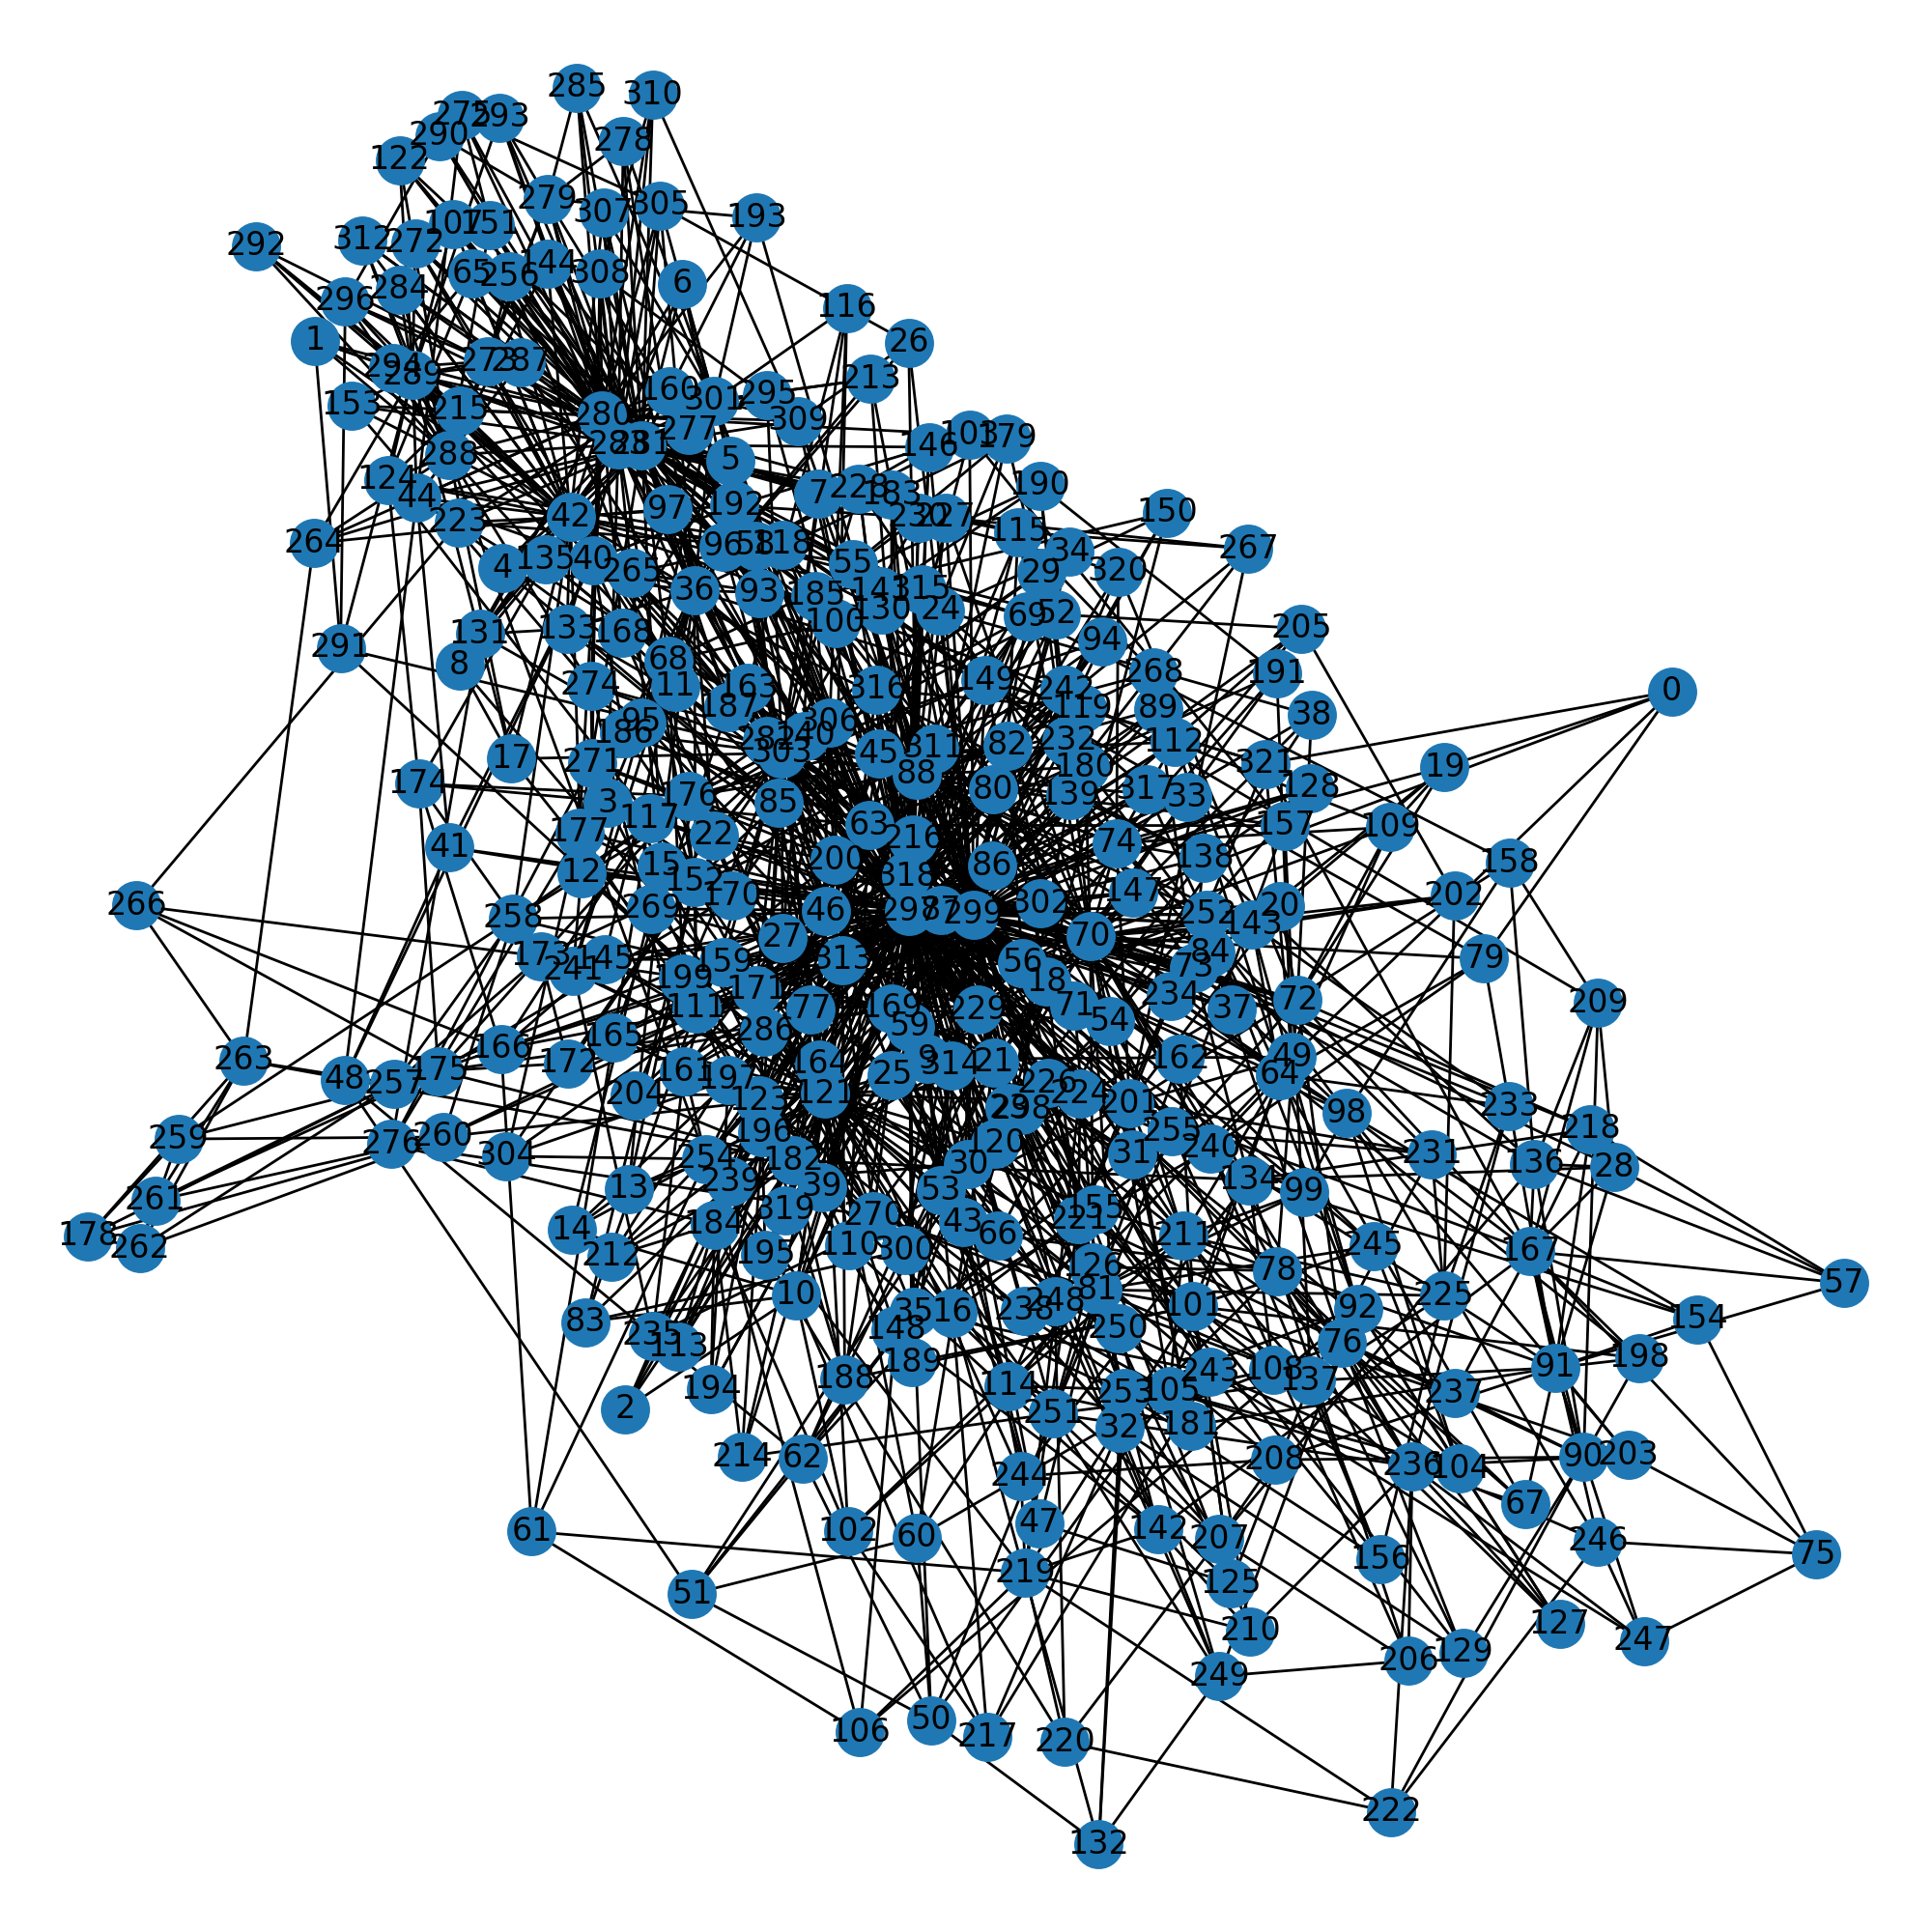

In [134]:
show_G(a_zwickau_G)

<IPython.core.display.Javascript object>


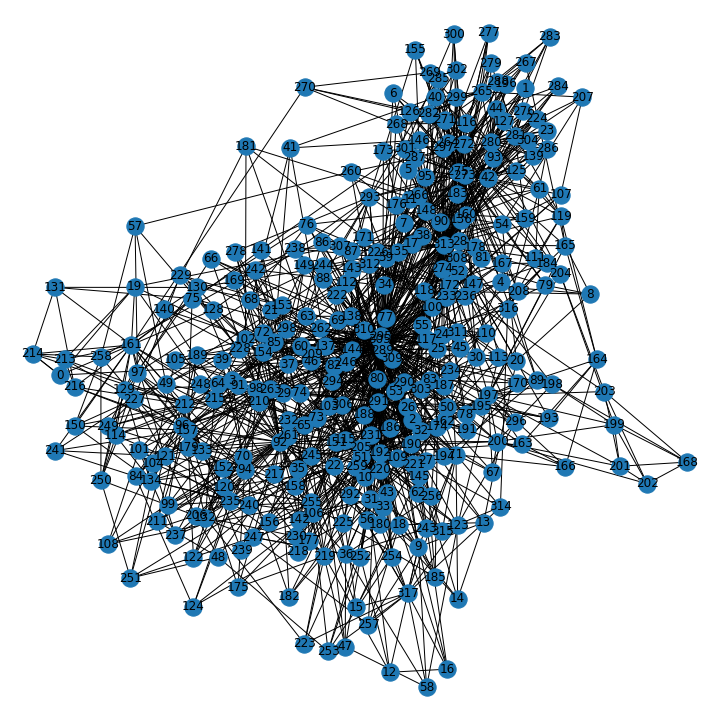

In [196]:
show_G(b_london_G)